In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
path = 'data1.txt'
data = pd.read_csv(path, header=None, names=['Population','Profit'])
data = (data - data.mean())/ data.std()
print(data.head())

   Population    Profit
0   -0.529654  2.132905
1   -0.680150  0.597261
2    0.092716  1.419690
3   -0.298872  1.091575
4   -0.594333  0.178606


In [2]:
def cost_function(x, y, theta):
    vec = np.power((np.dot(x,theta.T)-y),2)
    sum = np.sum(vec)/(2*x.shape[0])
    return sum

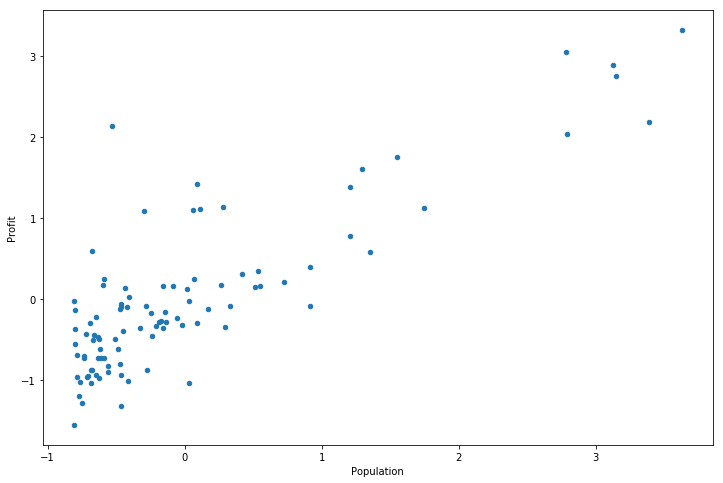

In [3]:
data.plot( kind='scatter',x='Population', y='Profit', figsize=(12,8))

In [4]:
data.insert(0, 'Ones', 1)


In [5]:
cols = data.shape[1] #no. of columns being denoted as the 1th element of the array
cols

3

In [6]:
x=data.iloc[:, 0:cols-1]


In [7]:
y = data.iloc[:,cols-1:cols]

In [8]:
x

,Ones,Population
0,1,-0.529654
1,1,-0.680150
2,1,0.092716
3,1,-0.298872
4,1,-0.594333
5,1,0.057650
6,1,-0.176594
7,1,0.108091
8,1,-0.432468
9,1,-0.802401


In [9]:
y.values

array([[ 2.13290482],
       [ 0.59726104],
       [ 1.41969013],
       [ 1.09157508],
       [ 0.17860583],
       [ 1.09738242],
       [-0.2705561 ],
       [ 1.11807109],
       [ 0.13784552],
       [-0.36704878],
       [-0.46947585],
       [ 1.75415697],
       [-0.48709752],
       [ 0.25165135],
       [-0.92971166],
       [-0.42216413],
       [-0.09697089],
       [-0.9579154 ],
       [-0.39695661],
       [-0.08163587],
       [-0.49009193],
       [ 2.89058201],
       [-0.2860363 ],
       [-0.11825845],
       [-0.50027293],
       [ 3.04865071],
       [ 1.39047192],
       [ 0.21914836],
       [ 1.60661408],
       [ 3.32250338],
       [-1.28108876],
       [ 0.02857667],
       [ 1.14238936],
       [-0.72403724],
       [ 0.12766451],
       [-0.23171947],
       [-0.31264121],
       [-0.44395982],
       [ 0.77634507],
       [-0.06201793],
       [-0.95867761],
       [-0.34982637],
       [-0.08234364],
       [-0.61676466],
       [ 0.16200045],
       [-0

In [10]:
theta = np.zeros((1,2))
theta

array([[ 0.,  0.]])

In [11]:
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [12]:
cost_function(x,y, theta)


Profit    0.494845
dtype: float64

In [77]:
def gradient_descent(x,y, theta, alpha, iterations):
    temp = theta.copy()
    #print(temp)
    #Scrape training data to exclude the ones.
    
    
    #initialise the cost array
    cost = np.zeros(iterations)
    
    for i in range(iterations):
        errorx =np.dot(x , theta.T) - y
        
        # V.V.IMP THAT THIS IS A SIMULTANEOUS UPDATE for theta! NOT ITERATIVE!!
        for j in range(x.shape[1]):
            x_t = x.iloc[:, j:j+1]
            temp[0,j] = theta[0,j] - (1/x.shape[0])*alpha*np.sum(np.dot(errorx,x_t.T))
            #print ((1/x.shape[0])*alpha*np.sum(np.dot(errorx,x_t.T)))
            
            
            
       # temp[0,0] = theta[0,0] - (1/x.shape[0])*alpha*np.sum(errorx)
        
        
        #print (theta[0,0])
        
       # temp[0,1] = theta[0,1] - (1/x.shape[0])*alpha*np.sum(np.dot(errorx,x_1.T))  
         
       # print ((1/x.shape[0])*alpha*np.sum(errorx), (1/x.shape[0])*alpha*np.sum(np.dot(errorx,x_1.T)))
        theta = temp.copy()
        #print (theta)
        cost[i] = cost_function(x, y, theta)
        #print(cost[i])
        #temp = theta.copy()
        
        
        #print(temp)
    return theta, cost

In [78]:
theta = np.ones((1,2))
alpha =0.0001
iterations = 1000

final_theta, cost = gradient_descent(x, y, theta,alpha, iterations)

cost_function(x, y, final_theta)

Profit    0.160455
dtype: float64

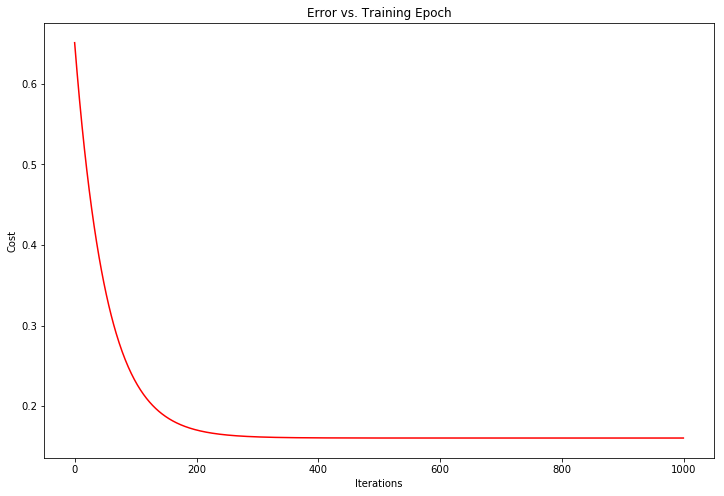

In [79]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), cost, 'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

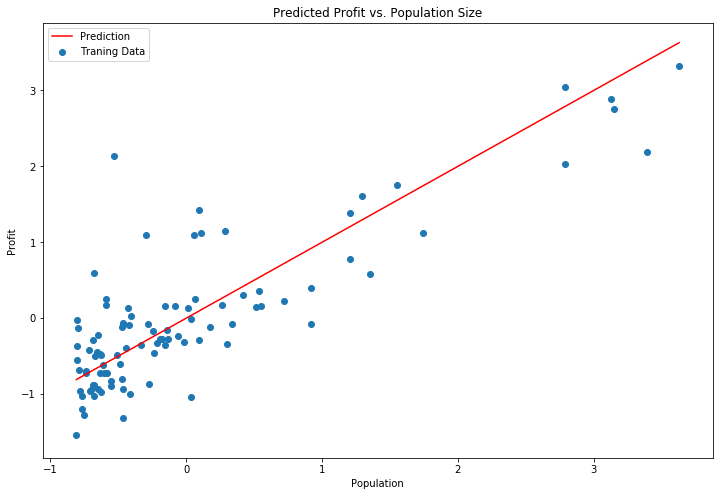

In [81]:
xdash = np.linspace(data.Population.min(), data.Population.max(), 100)
f = final_theta[0, 0] + (final_theta[0, 1] * xdash)
#print(f)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xdash, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Now, let us try to make this work for multiple variables.
Load data from a different file.

In [59]:
path2 = './data2.txt'
data2 = pd.read_csv(path2, header=None, names=['Size','Bedrooms','Prices'])
data2 = (data2 - data2.mean())/ data2.std()
print(data2.head())

       Size  Bedrooms    Prices
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389


In [60]:
data2.insert(0, 'Ones', 1)

In [61]:
data2.head()

,Ones,Size,Bedrooms,Prices
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [62]:
cols = data2.shape[1]
x2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]


In [63]:
theta2 = np.ones((1,3))

In [82]:
final2, cost2 =gradient_descent(x2,y2, theta2, alpha, 10000)

In [83]:
final2, cost2

(array([[ -3.32980471e-16,   1.00000000e+00,   1.00000000e+00]]),
 array([ 1.24180149,  1.2371565 ,  1.23255508, ...,  0.74649044,
         0.74649044,  0.74649044]))

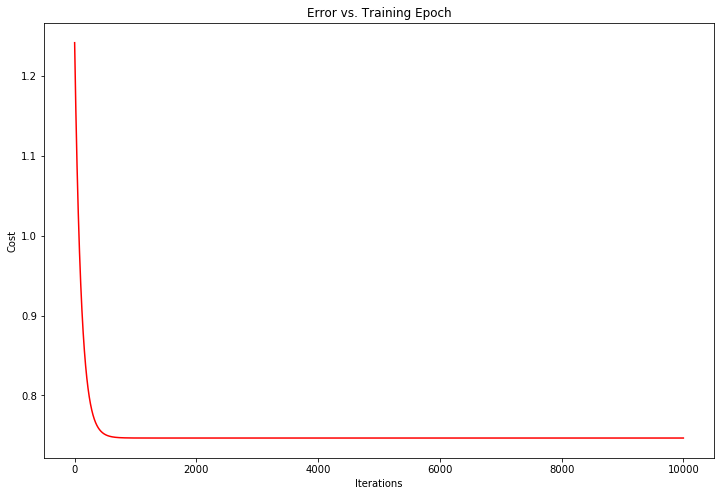

In [84]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(10000), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Completed for multiple variables as well.


Now, we have to implement all this(which was done from scratch) via scikit libraries.

# VIA IN-BUILT SCIKIT LIBRARY

In [86]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

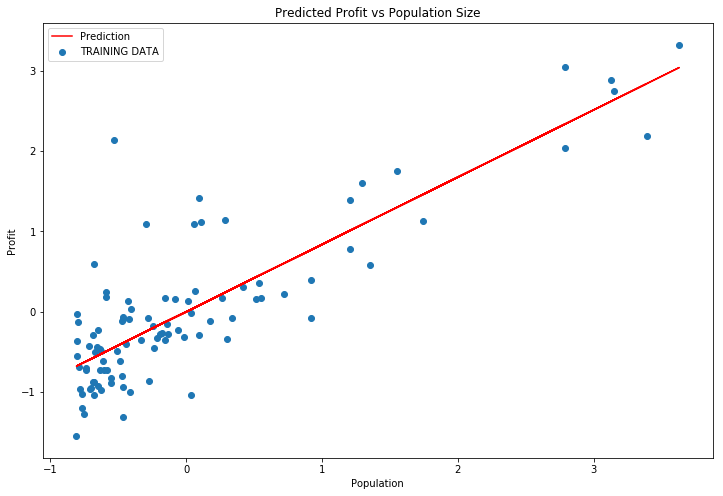

In [89]:
x_d = x.iloc[:,1:2]
f = model.predict(x).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_d, f, 'r', label='Prediction' )
ax.scatter(data.Population, data.Profit, label = "TRAINING DATA")
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs Population Size')
